# Deep Learning

## Réseaux de neurones

## Exercice 1 (MNIST avec Keras).

Exécutez les cellules suivantes et observez ce que vous obtenez.

In [4]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [5]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [6]:
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)

X_train shape:  (60000, 28, 28)
y_train shape:  (60000,)


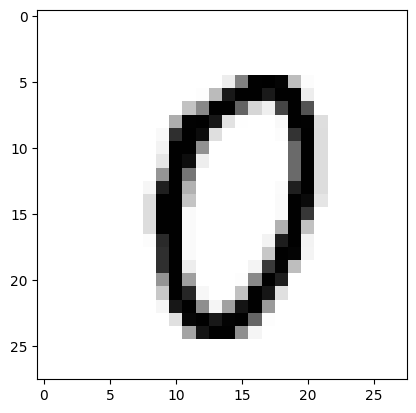

0


In [7]:
from matplotlib import pyplot as plt
import matplotlib.cm as cm
plt.imshow(X_train[1000], cmap=cm.Greys)
plt.show()

print(y_train[1000])

In [8]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train  = X_train / 255
X_test  = X_test / 255
num_pixels = X_train.shape[1] * X_train.shape[2]
print(num_pixels)

784


In [9]:
#Si vous travaillez avec tensorflow2, modifiez remplacez les deux lignes suivantes par ce qui suit :
#from tensorflow.keras.utils import to_categorical
#y_train = to_categorical(y_train)
#y_test = to_categorical(y_test)

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

1. Expliquer, avec une figure, l’architecture du réseau.

In [10]:
# Explication de l'architecture du réseau

# Entrée (Input Layer) :
# Chaque image du dataset MNIST est de taille 28×28 pixels, soit un total de 784 pixels.
# Les images sont aplaties en un vecteur d'entrée de 784 dimensions.

# Couches Cachées (Hidden Layers) :
# Un réseau typique pour MNIST peut inclure plusieurs couches entièrement connectées (dense layers).
# Ces couches apprennent des représentations hiérarchiques des données.
# Exemple : Une couche dense avec 128 ou 256 neurones utilisant une fonction d'activation comme ReLU.

# Sortie (Output Layer) :
# Il y a 10 neurones dans la couche de sortie correspondant aux 10 classes (chiffres de 0 à 9).
# La fonction d'activation est softmax, qui convertit les scores en probabilités.

# Prétraitement et Normalisation :
# - Les données d'entrée sont normalisées (valeurs entre 0 et 1).
# - Les labels sont transformés en vecteurs one-hot encoding pour s'adapter à la classification.


# Diagramme de l'architecture du réseau

print("""
        Entrée (Input Layer)
  +-----------------------------+
  |     28x28 Image (784)       | 
  +-----------------------------+
               |
               v
  +-----------------------------+
  | Couche Cachée 1 (128 neurones)| 
  |       Activation : ReLU      |
  +-----------------------------+
               |
               v
  +-----------------------------+
  | Couche Cachée 2 (256 neurones)| 
  |       Activation : ReLU      |
  +-----------------------------+
               |
               v
  +-----------------------------+
  |   Couche de Sortie (10)     |
  |       Activation : Softmax  |
  +-----------------------------+

Prétraitement :
- Normalisation des données (0-1)
- One-hot encoding des labels
""")




        Entrée (Input Layer)
  +-----------------------------+
  |     28x28 Image (784)       | 
  +-----------------------------+
               |
               v
  +-----------------------------+
  | Couche Cachée 1 (128 neurones)| 
  |       Activation : ReLU      |
  +-----------------------------+
               |
               v
  +-----------------------------+
  | Couche Cachée 2 (256 neurones)| 
  |       Activation : ReLU      |
  +-----------------------------+
               |
               v
  +-----------------------------+
  |   Couche de Sortie (10)     |
  |       Activation : Softmax  |
  +-----------------------------+

Prétraitement :
- Normalisation des données (0-1)
- One-hot encoding des labels



2. Définir, dans le programme, l’architecture de votre réseau.

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

# Définir l'architecture du réseau
model = Sequential()

# Couche d'entrée (flatten les images de 28x28 en un vecteur de 784 dimensions)
model.add(Flatten(input_shape=(28, 28)))

# Première couche cachée avec 128 neurones et activation ReLU
model.add(Dense(128, activation='relu'))

# Couche de sortie avec 10 neurones (pour 10 classes) et activation softmax
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Résumé du modèle
model.summary()


C:\Users\youne\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

2. Entrainer et tester le réseau. Changer d’algorithme d’optimisation, de pas d’apprentissage, etc.

In [12]:
# Entraîner le modèle avec les paramètres de base
history = model.fit(X_train, y_train, 
                    validation_split=0.2, 
                    epochs=10, 
                    batch_size=32)

# Évaluer le modèle sur les données de test
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8731 - loss: 0.4677 - val_accuracy: 0.9557 - val_loss: 0.1560
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9597 - loss: 0.1385 - val_accuracy: 0.9676 - val_loss: 0.1114
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9733 - loss: 0.0888 - val_accuracy: 0.9705 - val_loss: 0.1005
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9817 - loss: 0.0638 - val_accuracy: 0.9722 - val_loss: 0.0893
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9851 - loss: 0.0490 - val_accuracy: 0.9743 - val_loss: 0.0863
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9898 - loss: 0.0369 - val_accuracy: 0.9760 - val_loss: 0.0835
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9909 - loss: 0.0306 - val_accuracy: 0.9754 - val_loss: 0.0848
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9941 - loss: 0.0205 - 

In [13]:
from keras.optimizers import SGD

# Redéfinir et compiler le modèle avec SGD
model.compile(optimizer=SGD(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Réentraîner le modèle
history_sgd = model.fit(X_train, y_train, 
                        validation_split=0.2, 
                        epochs=10, 
                        batch_size=32)

# Tester le modèle avec SGD
test_loss_sgd, test_accuracy_sgd = model.evaluate(X_test, y_test)
print(f"Test Loss with SGD: {test_loss_sgd}")
print(f"Test Accuracy with SGD: {test_accuracy_sgd}")


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9982 - loss: 0.0083 - val_accuracy: 0.9779 - val_loss: 0.0843
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9989 - loss: 0.0064 - val_accuracy: 0.9779 - val_loss: 0.0836
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9993 - loss: 0.0056 - val_accuracy: 0.9779 - val_loss: 0.0834
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9994 - loss: 0.0054 - val_accuracy: 0.9774 - val_loss: 0.0835
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9993 - loss: 0.0052 - val_accuracy: 0.9782 - val_loss: 0.0834
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9996 - loss: 0.0048 - val_accuracy: 0.9780 - val_loss: 0.0832
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9997 - loss: 0.0045 - val_accuracy: 0.9778 - val_loss: 0.0833
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9997 - loss: 0.0044 - 

In [14]:
from keras.optimizers import Adam

# Recompiler le modèle avec un learning rate ajusté
model.compile(optimizer=Adam(learning_rate=0.005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Réentraîner le modèle
history_adam = model.fit(X_train, y_train, 
                         validation_split=0.2, 
                         epochs=10, 
                         batch_size=32)

# Tester le modèle avec Adam (learning rate ajusté)
test_loss_adam, test_accuracy_adam = model.evaluate(X_test, y_test)
print(f"Test Loss with adjusted Adam: {test_loss_adam}")
print(f"Test Accuracy with adjusted Adam: {test_accuracy_adam}")


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9683 - loss: 0.1038 - val_accuracy: 0.9601 - val_loss: 0.1499
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9761 - loss: 0.0765 - val_accuracy: 0.9657 - val_loss: 0.1449
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9779 - loss: 0.0748 - val_accuracy: 0.9598 - val_loss: 0.1746
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9825 - loss: 0.0577 - val_accuracy: 0.9693 - val_loss: 0.1441
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9826 - loss: 0.0588 - val_accuracy: 0.9673 - val_loss: 0.1534
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9850 - loss: 0.0521 - val_accuracy: 0.9647 - val_loss: 0.1862
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9872 - loss: 0.0461 - val_accuracy: 0.9694 - val_loss: 0.1734
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9861 - loss: 0.0497 - 

4. Ajouter une couche cachée avec 10 neurones, puis avec 64 neurones.

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

# Redéfinir le modèle avec des couches supplémentaires
model = Sequential()

# Couche d'entrée (Flatten)
model.add(Flatten(input_shape=(28, 28)))

# Première couche cachée avec 128 neurones (comme avant)
model.add(Dense(128, activation='relu'))

# Ajouter une couche cachée avec 10 neurones
model.add(Dense(10, activation='relu'))

# Ajouter une couche cachée avec 64 neurones
model.add(Dense(64, activation='relu'))

# Couche de sortie (10 classes pour les chiffres 0-9)
model.add(Dense(10, activation='softmax'))

# Compiler le modèle
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Résumé du modèle
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103,124 (402.83 KB)

 Trainable params: 103,124 (402.83 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Entraîner le modèle
history = model.fit(X_train, y_train, 
                    validation_split=0.2, 
                    epochs=10, 
                    batch_size=32)

# Tester le modèle
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8061 - loss: 0.6104 - val_accuracy: 0.9560 - val_loss: 0.1534
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9562 - loss: 0.1447 - val_accuracy: 0.9630 - val_loss: 0.1299
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9703 - loss: 0.0975 - val_accuracy: 0.9672 - val_loss: 0.1152
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9775 - loss: 0.0749 - val_accuracy: 0.9703 - val_loss: 0.1062
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9813 - loss: 0.0572 - val_accuracy: 0.9727 - val_loss: 0.0981
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9848 - loss: 0.0468 - val_accuracy: 0.9708 - val_loss: 0.1080
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9868 - loss: 0.0398 - val_accuracy: 0.9683 - val_loss: 0.1326
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9907 - loss: 0.0327 - 

## Exercice 2 (MNIST avec CNN)

Exécutez les instructions suivantes. Prenez le temps de comprendre ce que fait chaqque cellule.

In [17]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

img_rows, img_cols = X_train.shape[1], X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train  = X_train / 255
X_test  = X_test / 255

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [18]:
#On charge les bibliothèques :
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D

1. Définir un réseau de neurones à convolution avec :

– une couche de convolution avec $32$ filters, chacun de taille $3\times 3$

– une couche de maxpooling (pool de taille $2\times 2$).

– un réseau "fully connected" à plusieurs couches

In [19]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Définir le modèle
model = Sequential()

# Couche de convolution : 32 filtres, taille 3x3, activation ReLU
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# Couche de max pooling : taille du pool 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Aplatir les caractéristiques extraites par la convolution
model.add(Flatten())

# Réseau fully connected : première couche dense avec 128 neurones
model.add(Dense(128, activation='relu'))

# Réseau fully connected : deuxième couche dense avec 64 neurones
model.add(Dense(64, activation='relu'))

# Couche de sortie : 10 neurones (correspondant aux 10 classes) avec activation softmax
model.add(Dense(10, activation='softmax'))

# Compiler le modèle
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Résumé du modèle
model.summary()

C:\Users\youne\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 701,578 (2.68 MB)

 Trainable params: 701,578 (2.68 MB)

 Non-trainable params: 0 (0.00 B)

2. Entrainer le modèle et le tester.

In [20]:
# Entraîner le modèle
history = model.fit(X_train, y_train,
                    validation_split=0.2,  # 20% des données pour la validation
                    epochs=10,            # Nombre d'itérations
                    batch_size=32,        # Taille des lots
                    verbose=1)            # Affichage des progrès

# Tester le modèle sur les données de test
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.8935 - loss: 0.3472 - val_accuracy: 0.9764 - val_loss: 0.0771
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9814 - loss: 0.0608 - val_accuracy: 0.9835 - val_loss: 0.0534
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.9887 - loss: 0.0339 - val_accuracy: 0.9849 - val_loss: 0.0494
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9928 - loss: 0.0229 - val_accuracy: 0.9843 - val_loss: 0.0604
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9952 - loss: 0.0142 - val_accuracy: 0.9768 - val_loss: 0.0868
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9959 - loss: 0.0120 - val_accuracy: 0.9840 - val_loss: 0.0628
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9969 - loss: 0.0096 - val_accuracy: 0.9845 - val_loss: 0.0598
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9980 -

3. Choisir les bons hyper-paramètres pour atteindre une précision d’au moins 99%.

In [21]:
from keras.layers import Dropout

# Définir un modèle plus complexe
model = Sequential()

# Couche de convolution : 32 filtres, taille 3x3
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Couche de convolution supplémentaire : 64 filtres, taille 3x3
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Aplatir les caractéristiques
model.add(Flatten())

# Fully connected avec 128 neurones
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout pour régularisation

# Fully connected avec 64 neurones
model.add(Dense(64, activation='relu'))

# Couche de sortie : 10 neurones avec activation softmax
model.add(Dense(10, activation='softmax'))

# Compiler avec un learning rate réduit
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Résumé du modèle
model.summary()

# Entraîner le modèle
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=20,
                    batch_size=64,  # Augmenter batch_size peut aider
                    verbose=1)

# Évaluer le modèle
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 232,650 (908.79 KB)

 Trainable params: 232,650 (908.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.7729 - loss: 0.6934 - val_accuracy: 0.9789 - val_loss: 0.0735
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.9631 - loss: 0.1268 - val_accuracy: 0.9830 - val_loss: 0.0560
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.9752 - loss: 0.0831 - val_accuracy: 0.9855 - val_loss: 0.0494
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.9814 - loss: 0.0626 - val_accuracy: 0.9892 - val_loss: 0.0417
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.9840 - loss: 0.0537 - val_accuracy: 0.9893 - val_loss: 0.0391
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.9872 - loss: 0.0411 - val_accuracy: 0.9895 - val_loss: 0.0373
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.9872 - loss: 0.0392 - val_accuracy: 0.9878 - val_loss: 0.0456
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.9888 - loss: 0.0350 - 

In [22]:
from keras.callbacks import ReduceLROnPlateau

# Réduire le learning rate si la performance stagne
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', 
                              factor=0.5, 
                              patience=3, 
                              min_lr=1e-5, 
                              verbose=1)

# Réentraîner avec le callback
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=20,
                    batch_size=64,
                    callbacks=[reduce_lr],
                    verbose=1)


Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.9959 - loss: 0.0125 - val_accuracy: 0.9925 - val_loss: 0.0405 - learning_rate: 0.0010
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.9957 - loss: 0.0123 - val_accuracy: 0.9923 - val_loss: 0.0410 - learning_rate: 0.0010
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.9962 - loss: 0.0121 - val_accuracy: 0.9895 - val_loss: 0.0512 - learning_rate: 0.0010
Epoch 4/20
748/750 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9962 - loss: 0.0115
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.9962 - loss: 0.0115 - val_accuracy: 0.9925 - val_loss: 0.0435 - learning_rate: 0.0010
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.9977 - loss: 0.0075 - val_accuracy: 0.9923 - val_loss: 0.0464 - learning_rate: 5.0000e-04
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.9983 -

### By : Monir Chelh 
#### 2025-2024
